In [2]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
# 데이터 통계 요약정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
# 결측치 확인
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [6]:
# 중복 데이터 확인
df.duplicated().sum()

np.int64(0)

In [7]:
# 결측치는 아니지만, 데이터 타입이 일치하지 않은 데이터들을 찾아 na로 변경 - 일괄처리 위함
# horespower
df.horsepower.unique()
# ? 존재

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [8]:
# # 1번째 방법
# is_continue = True
# while is_continue:
#     try:
#         df['horsepower'] = df.horsepower.astype(float)
#     except Exception as e:
#         print(e.__str__().split(':')[-1].strip())
#         temp = e.__str__().split(':')[-1].strip()
#         df['horsepower'] = df.horsepower.replace(temp,pd.NA)
#     else:
#         is_continue = False


In [9]:
# 2번째 방법
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce')

In [10]:
# 3번째 방법
# df.horsepower.apply(lambda x : x if isinstance(x,float) else pd.NA)

In [11]:
# 결측치 처리방안

# 1. 결측치가 있는 row 전부 출력하기
# any() : 각 행마다 True 값이 하나라도 있으면 그 행 전체에 대해 True를 반환
# axis=1 : 행 기준으로 계산
df[df.isnull().any(axis=1)]
# df[df.horsepower.isna()]

# 판단: 만약 cylinders=4인 경우는 많아서, 결측치를 제거해도 상관없음
# But, cylinders=6인 경우가 많지 않다면, 결측치를 쉽게 제거할 수 없음

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [38]:
df['cylinders'].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

In [12]:
# 결측치 제거
df = df.dropna()
# 결측치 제거 후 index가 중간중간 비게 되기 때문에, index 재정렬
df.reset_index(drop=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


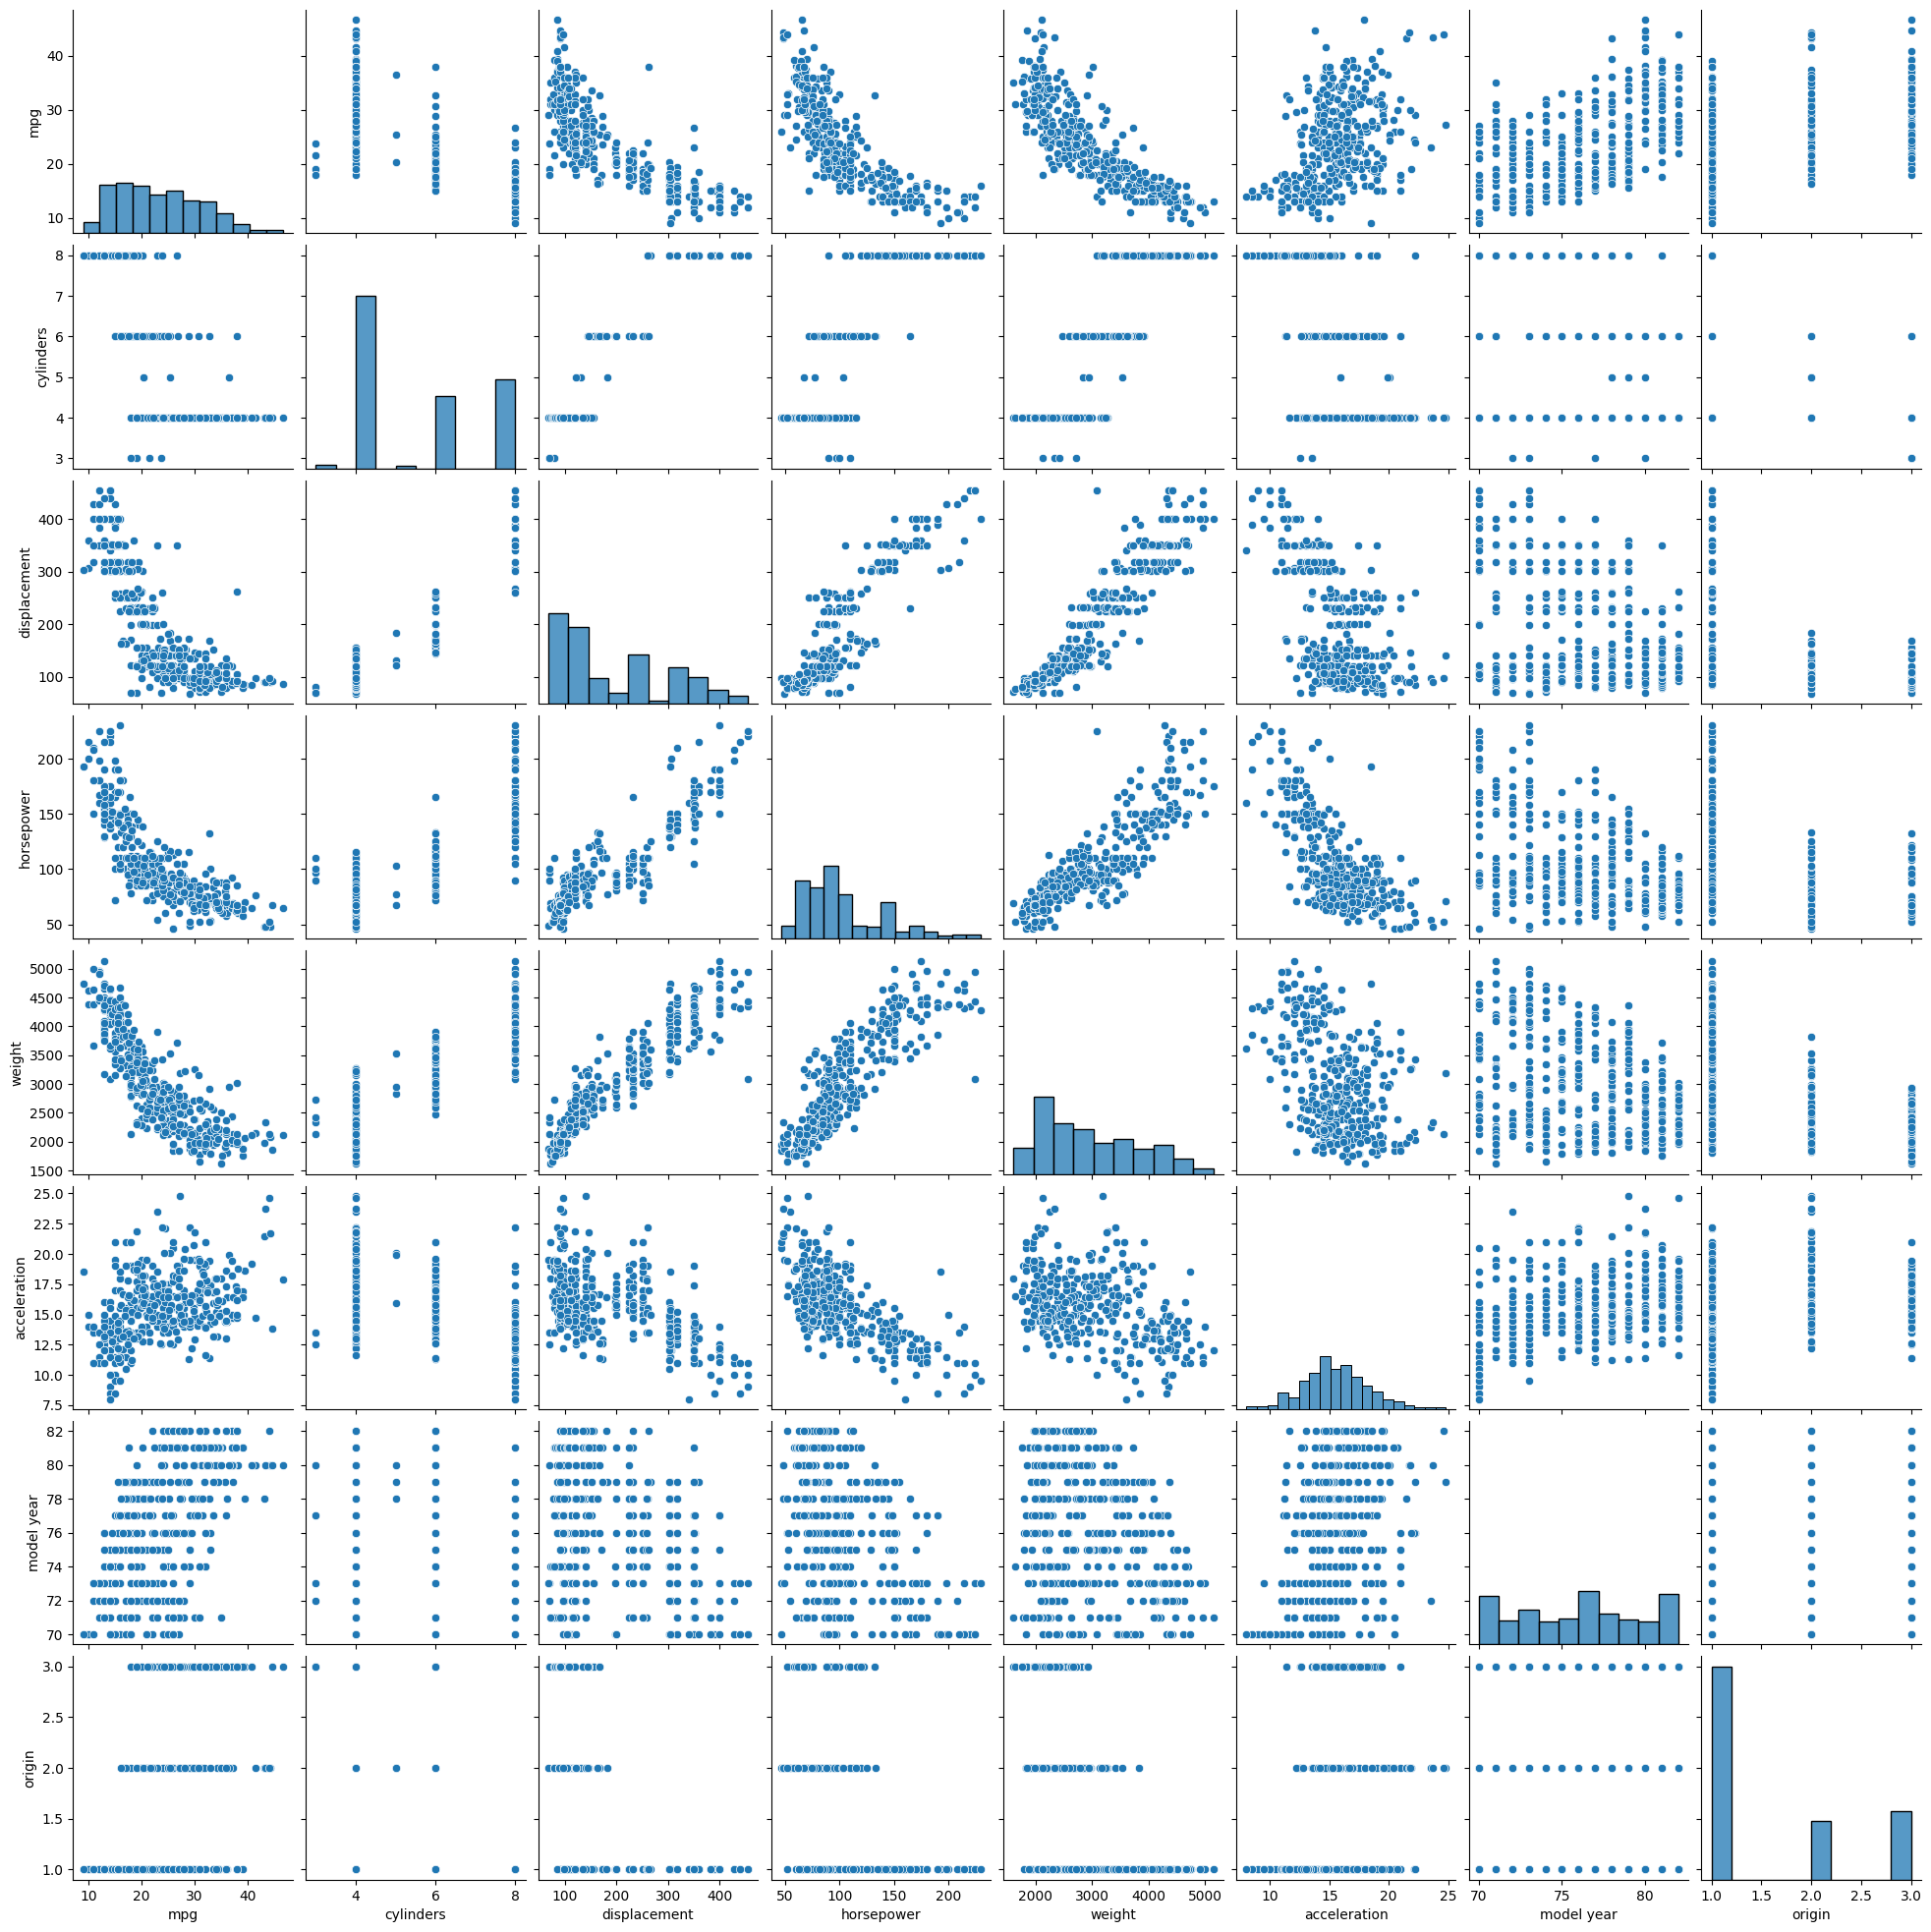

In [13]:
# seaborn pairplot
# 산점도: 분포 확인, 선형관계 확인
sns.pairplot(df);

In [14]:
# 상관계수 분석 - 데이터프레임
# numeric_only=True -> 숫자형 데이터만 사용(object, category 제외)
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


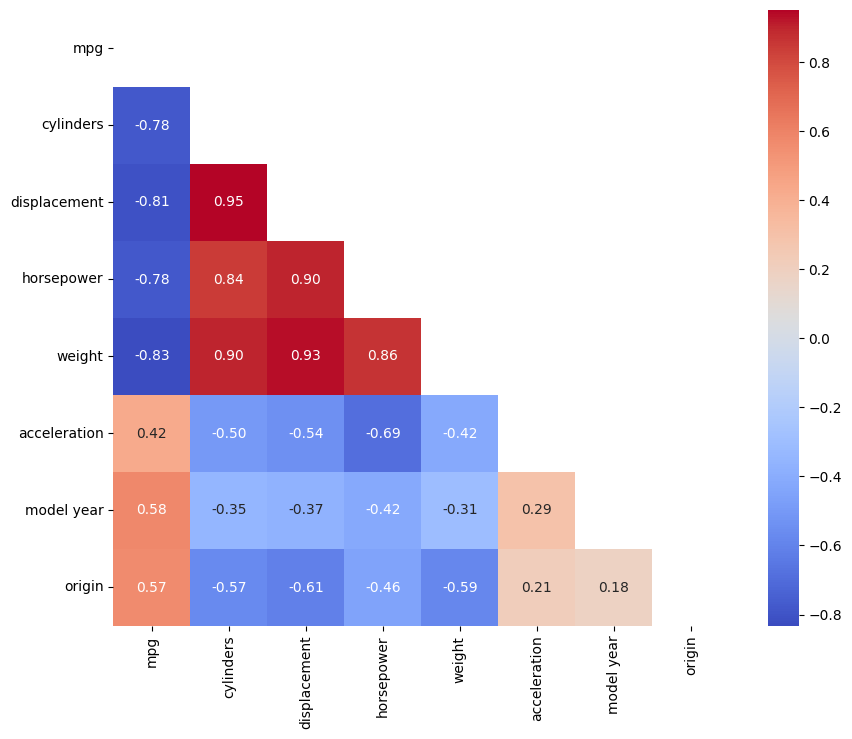

In [15]:
# 상관계수 분석 - 히트맵
mask = np.triu(np.ones_like(corr, dtype=bool))   # 마스크 생성 (상단 트라이앵글을 숨김)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', 
            annot=True, fmt=".2f", cbar=True, square=True)
plt.show()

In [16]:
'''
[Step 3] 데이터 전처리
'''

# horsepower 열의 고유값 확인
df['horsepower'].unique()          

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [17]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)

df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

df.describe()                                   

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# 결측치 제거
print(df['horsepower'].isnull().sum())

df_nan = df.dropna(subset=['horsepower'], axis=0)                 
print(df_nan['horsepower'].isnull().sum())

0
0


In [ ]:
# 결측치 대체
print(df['horsepower'].isnull().sum())

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())               
print(df['horsepower'].isnull().sum())

0
0


In [20]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [21]:
# 수치형 데이터 출력
df.describe().columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [22]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 제일 중요. 학습에 영향을 미침
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['name', 'mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head() 

,name,mpg,cylinders,horsepower,weight
0,chevrolet chevelle malibu,18.0,8,130.0,3504.0
1,buick skylark 320,15.0,8,165.0,3693.0
2,plymouth satellite,18.0,8,150.0,3436.0
3,amc rebel sst,16.0,8,150.0,3433.0
4,ford torino,17.0,8,140.0,3449.0


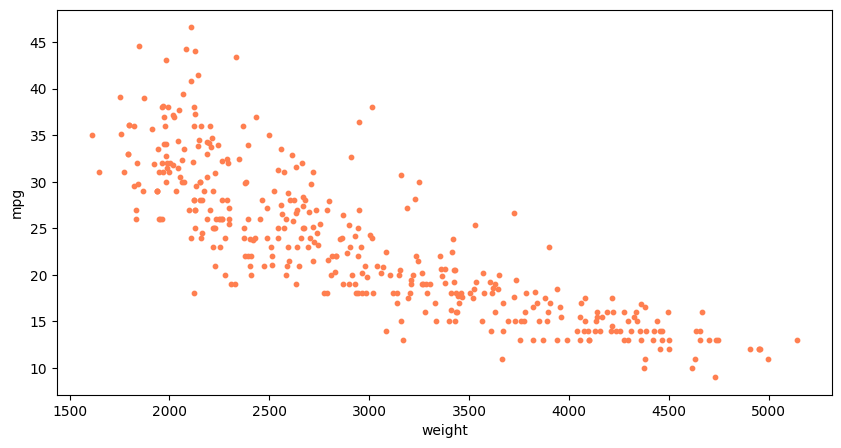

In [23]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()

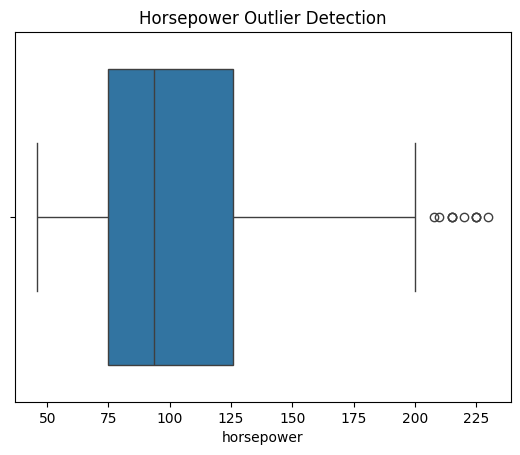

In [24]:
sns.boxplot(x=ndf['horsepower'])
plt.title('Horsepower Outlier Detection')
plt.show()

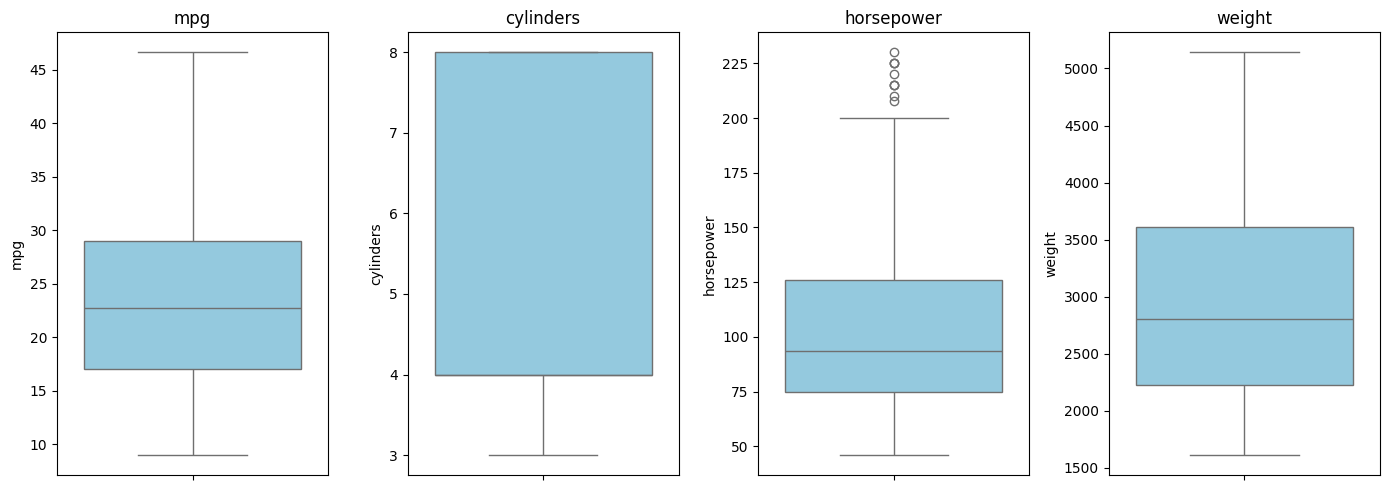

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['mpg', 'cylinders', 'horsepower', 'weight']  # 보고 싶은 변수
fig, axes = plt.subplots(1, 4, figsize=(14, 5))       # 1행 4열 subplot 생성

for i, col in enumerate(cols):
    sns.boxplot(y=ndf[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')  # X축 라벨 제거

plt.tight_layout()
plt.show()


In [36]:
## mpg 이상치 탐색
# 1. IQR 계산
Q1 = ndf['mpg'].quantile(0.25)
Q3 = ndf['mpg'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 2. 이상치 포함 행(row) 확인
outlier_rows = ndf[(ndf['mpg'] < lower) | (ndf['mpg'] > upper)]
print(outlier_rows)

Empty DataFrame
Columns: [name, mpg, cylinders, horsepower, weight]
Index: []


In [27]:
## horsepower 이상치 탐색
# 1. IQR 계산
Q1 = ndf['horsepower'].quantile(0.25)
Q3 = ndf['horsepower'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 2. 이상치 포함 행(row) 확인
outlier_rows = ndf[(ndf['horsepower'] < lower) | (ndf['horsepower'] > upper)]
print(outlier_rows)

                             name   mpg  cylinders  horsepower  weight
6                chevrolet impala  14.0          8       220.0  4354.0
7               plymouth fury iii  14.0          8       215.0  4312.0
8                pontiac catalina  14.0          8       225.0  4425.0
13        buick estate wagon (sw)  14.0          8       225.0  3086.0
25                      ford f250  10.0          8       215.0  4615.0
27                     dodge d200  11.0          8       210.0  4382.0
67                mercury marquis  11.0          8       208.0  4633.0
94   chrysler new yorker brougham  13.0          8       215.0  4735.0
95       buick electra 225 custom  12.0          8       225.0  4951.0
116            pontiac grand prix  16.0          8       230.0  4278.0


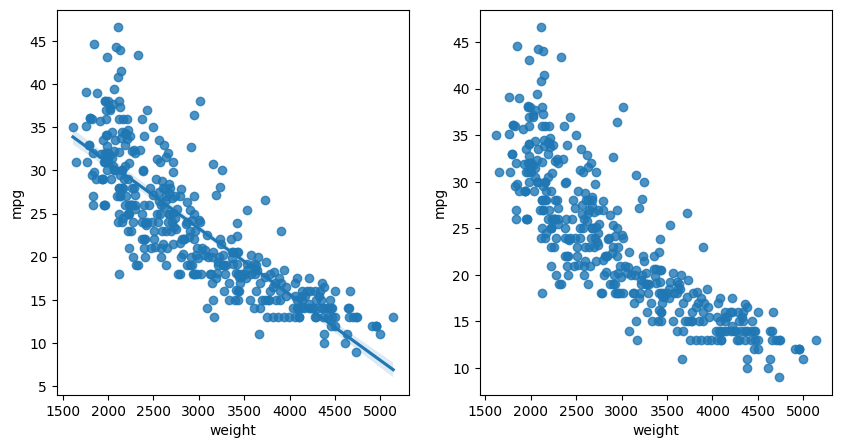

In [28]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()

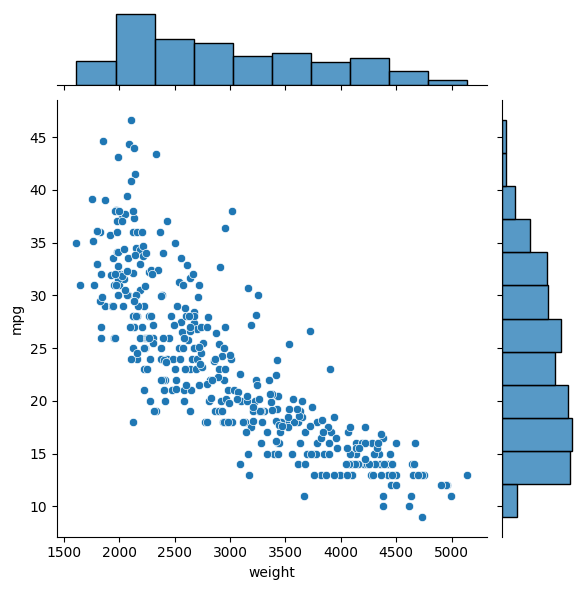

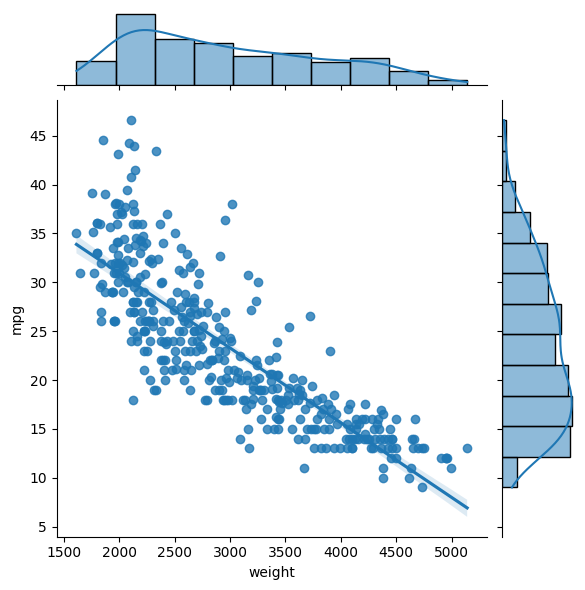

In [29]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf);             # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf);  # 회귀선 표시

In [37]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))
print('total_data 개수: ', len(X))

train data 개수:  274
test data 개수:  118
total_data 개수:  392


In [31]:
'''
Step 5: 단순회귀분석 모델 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr = LinearRegression()   

# train data를 가지고 모델 학습
lr.fit(X_train, y_train)

# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.6822458558299325


In [ ]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)

# 회귀식의 y절편
print('y절편 b', lr.intercept_)

# y = -0.00775343 x +  46.7103662572801

기울기 a:  [-0.00775343]
y절편 b 46.7103662572801


In [33]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X_test)

# 오차 계산
test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test'])**2
test_preds

,y_test,y_hat,squared_error
243,21.5,25.621032,16.982906
371,29.0,27.132951,3.485871
300,23.9,20.193630,13.737179
345,35.1,33.064327,4.143967
265,17.5,15.076365,5.874006
...,...,...,...
384,32.0,31.474873,0.275758
20,25.0,25.993197,0.986440
189,15.5,15.991270,0.241346
60,20.0,28.040103,64.643253


In [34]:
# 평균 제곱 오차
mse = test_preds['squared_error'].mean()
print('mse: ', mse)

mse:  17.9901789410548


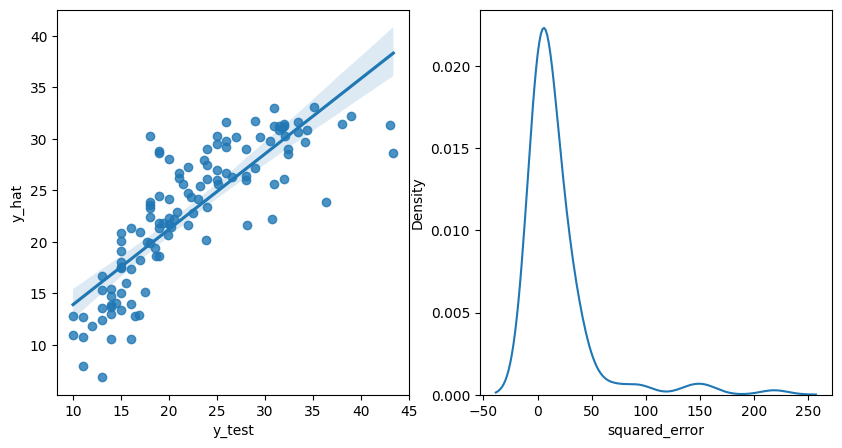

In [35]:
# 오차 분석
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat',  data=test_preds, ax=axes[0]);  
sns.kdeplot(x='squared_error',  data=test_preds, ax=axes[1]); 

In [ ]:
## 결정계수 R^2
    # y_bar: 모든 y값의 평균
    # y_hat: 예측값, 모델이 예측한 i번째 데이터의 값
    # 결정계수: 1-RSS/TSS
    # RSS: 잔차제곱합 sum( (yi-y_hat)^2 ) -> 값이 작을수록 모델이 정확함 (모델이 설명하지 못한 변동량)
    # TSS: 총제곱합 sum( (yi-y_bar)^2 ) -> 단순 평균값, 데이터의 흩어짐 정도 (데이터의 총 변동량)
        # R^2=0.85 -> 85% 예측, 15% 예측하지 못함

In [ ]:
# 선형회귀는 단순 MSE, MSA 평가로 무엇이 좋은모델인지 알 수 없다.
# 결정계수를 통해 확률로 알 수 있다.

### 예제1

In [ ]:
# 결측치를 제거하지 말고 대체하여 모델 성능 비교하기

In [ ]:
# 독립변수를 weight가 아닌 다른 변수로 했을 때, 모델의 성능 측정하기
# 1. target data와 선형관계가 뚜렷하거나 선형관계가 있다고 판단되는 변수 선정
# 2. 학습용/테스트용 데이터를 8:2로 분류
# 3. 결정계수와 MSE 출력
# 4. 오차 분석 (시각화)

horsepower 의 결측치를 제거하지 않고, 평균으로 대체한 경우

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv('./data/auto-mpg.csv', header=None)

df2.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 


df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [98]:
df2['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [99]:
df2['horsepower'] = df2['horsepower'].replace('?', np.nan)
df2['horsepower'] = df2['horsepower'].astype(float)

In [ ]:
print(df2['horsepower'].isnull().sum()) #6

# 평균값으로 대체
df2['horsepower'] = df2['horsepower'].fillna(df2['horsepower'].mean())

print(df2['horsepower'].isnull().sum()) #0

6
0


In [94]:
df2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [88]:
X=df2[['horsepower']]  #독립 변수 X
y=df2['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.2,   #검증 20%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))
print('total_data 개수: ', len(X))

train data 개수:  318
test data 개수:  80
total_data 개수:  398


In [89]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()   

lr.fit(X_train, y_train)

# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.566233169435868


In [90]:
print('기울기 a: ', lr.coef_)
print('y절편 b', lr.intercept_)

# y = -0.00775343 x +  46.7103662572801

기울기 a:  [-0.15718751]
y절편 b 40.014791354027444


In [91]:
y_hat = lr.predict(X_test)

# 오차 계산
test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test'])**2
test_preds

,y_test,y_hat,squared_error
331,33.8,29.483228,18.634520
111,18.0,25.867915,61.904091
350,34.7,30.111978,21.049945
205,28.0,28.225728,0.050953
56,26.0,29.011666,9.070129
...,...,...,...
304,37.3,29.168853,66.115551
187,17.5,18.008540,0.258613
166,13.0,19.737602,45.395285
64,15.0,16.436665,2.064005


In [92]:
mse = test_preds['squared_error'].mean()
print('mse: ', mse)

mse:  26.527009845388818


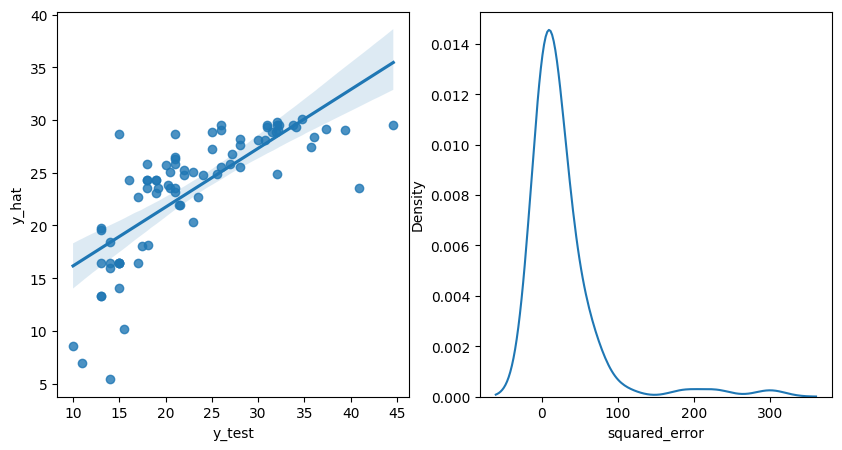

In [93]:
# 오차 분석
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat',  data=test_preds, ax=axes[0]);  
sns.kdeplot(x='squared_error',  data=test_preds, ax=axes[1]); 

### 예제2

displacement와 mpg 관계 모델 성능

In [ ]:
# displacement와 mpg

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['displacement']],df['mpg'], test_size=0.2, random_state=45)
len(x_train), len(x_test), len(y_train),len(y_test)

(313, 79, 313, 79)

In [87]:
# sklearn 계열의 데이터는 항상 2차원 (2-dimensional)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)

r_square = lr.score(x_test,y_test)
r_square

0.6592316739574486

데이터 정규화 또는 스케일링, 이상치 여부 확인하고 제거
- 정규화: Min-Max Scaling -> 데이터를 0~1사이의 값으로 압축
- 표준화: StandardScaler -> 데이터를 평균0, 표쥰편차1

- 이상치 제거
- 구간화: 범주형 데이터로 변환

In [101]:
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()

scaled_weight = sds.fit_transform(df[['weight']])
print(scaled_weight[:2])

x_train,x_test,y_train,y_test = train_test_split(scaled_weight,df['mpg'])
len(x_train), len(y_train)

[[0.62054034]
 [0.84333403]]


(294, 294)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)

r_square = lr.score(x_test,y_test)
r_square